## Testing the Flows

Potentials created by the different Ion Channels

In [68]:
from cells import layer_v_1 # Your Model to test
from neuron import h, gui
from helpers.record import *
import numpy as np
import copy
from importlib import reload
from helpers import ap, rheobase, generic, stimulation, rmp


In [69]:
reload(layer_v_1)
cellmodule = layer_v_1

In [102]:
cell = cellmodule.SPI6()
singlepulse = h.IClamp(cell.soma(0.5))
singlepulse.delay = 100
singlepulse.dur = 500
singlepulse.amp = 0
apc = h.APCount(cell.soma(0.5))
apc.thresh = 30

v_vec = h.Vector()
a_vec = h.Vector()# Membrane potential vector
t_vec = h.Vector() 
ih_vec = h.Vector()
na_vec = h.Vector()
k_vec = h.Vector()
v_vec.record(cell.soma(0.5)._ref_v)
ih_vec.record(cell.soma(0.5)._ref_i_ih)
na_vec.record(cell.soma(0.5)._ref_ina_nax)
k_vec.record(cell.soma(0.5)._ref_ik_kdmc)
t_vec.record(h._ref_t)
apc.record(a_vec)
h.tstop = 800
h.run()
it = {"v": np.array(v_vec),
      "t": np.array(t_vec),
      "ih": np.array(ih_vec),
      "na": np.array(na_vec), 
      "kdmc": np.array(k_vec), 
      "aps": np.array(a_vec)}

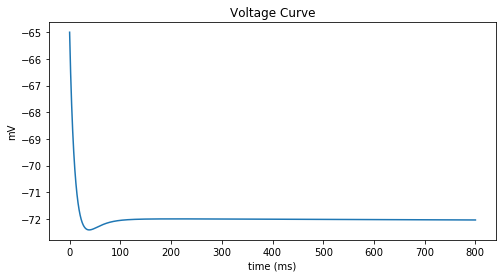

In [104]:
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
pyplot.plot(it["t"], it["v"])
pyplot.xlabel('time (ms)')
pyplot.ylabel('mV')
pyplot.title("Voltage Curve")
pyplot.show()

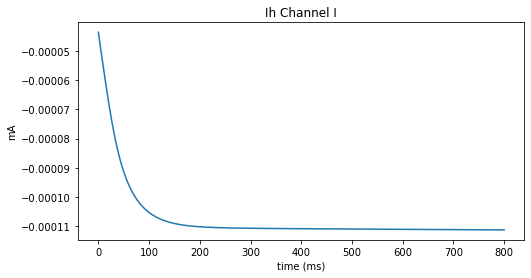

In [105]:
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
pyplot.plot(it["t"], it["ih"])
pyplot.xlabel('time (ms)')
pyplot.ylabel('mA')
pyplot.title("Ih Channel I")
pyplot.show()

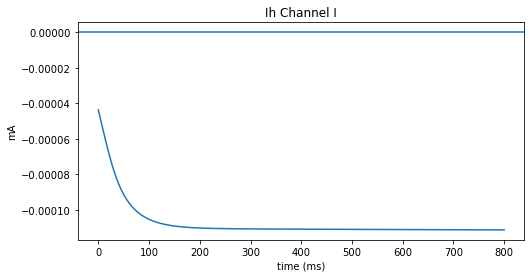

In [106]:
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
pyplot.plot(it["t"], it["ih"])
pyplot.axhline(0)
pyplot.xlabel('time (ms)')
pyplot.ylabel('mA')
pyplot.title("Ih Channel I")
pyplot.show()

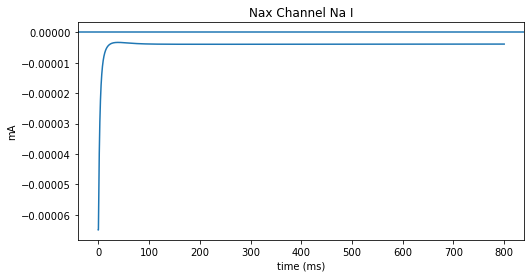

In [107]:
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
pyplot.plot(it["t"], it["na"])
pyplot.xlabel('time (ms)')
pyplot.axhline(0)
pyplot.ylabel('mA')
pyplot.title("Nax Channel Na I")
pyplot.show()

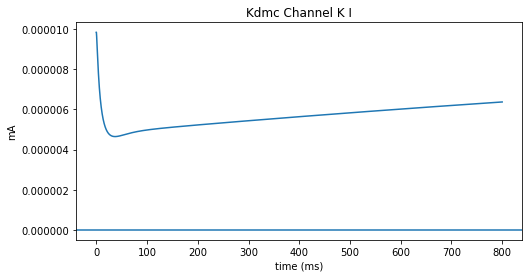

In [108]:
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
pyplot.plot(it["t"], it["kdmc"])
pyplot.xlabel('time (ms)')
pyplot.axhline(0)
pyplot.ylabel('mA')
pyplot.title("Kdmc Channel K I")
pyplot.show()